In [1]:
import os, pdb
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, ScalarFormatter

In [2]:
import colossus
import colossus.halo
from colossus.halo import mass_defs, concentration
from colossus.halo import mass_adv
from colossus.lss import mass_function
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')

In [4]:
def mhalo_relations(mvir, halodef='200c', redshift=0.0):
    conc = concentration.concentration(mvir, 'vir', redshift)
    mnew, Rnew, cnew = mass_defs.changeMassDefinition(mvir, conc, redshift, 'vir', halodef)
    return np.log10(Rnew)

In [23]:
def radius(minmass=1, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    logm200m = mhalo_relations(mvir, '200m')
    logm500m = mhalo_relations(mvir, '500m')
    
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(logmvir, logm200c, 'blue', lw=2, ls='-', label='M(200c)')
    ax.plot(logmvir, logm500c, 'orange', lw=2, ls='--', label='M(500c)')
    ax.plot(logmvir, logm200m, 'red', lw=2, ls='-.', label='M(200m)')
    ax.plot(logmvir, logm500m, 'black', lw=2, ls=':', label='M(500m)')
    
    ax.set_xlim(7.3, maxmass-dm)
    ax.set_ylim(minmass, 6)
    ax.margins(0)
    ax.legend(loc='upper left')
    #plt.savefig('DMH4')

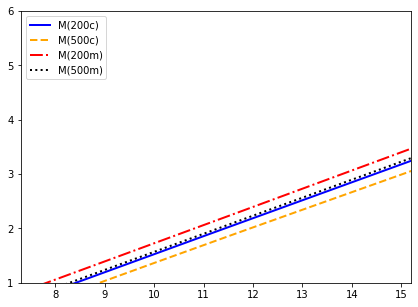

In [24]:
radius()